1° Passo - Utilizar Biblioteca Pandas para ler o DataSet

In [14]:
import pandas as pd

tabela = pd.read_csv("Base_Simulada_Bolsa_Fam_lia.csv")

display(tabela.head())

,idade_responsavel,renda_familiar,numero_dependentes,escolaridade_responsavel,estado,recebe_bolsa_familia,nao_pagou
0,56,809,3,Médio,CE,0,0
1,69,1579,5,Médio,RJ,0,0
2,46,1534,4,Fundamental,MA,1,1
3,32,748,3,Fundamental,RS,1,1
4,60,417,5,Médio,BA,1,1


2° Passo - Entender os tipos de dados

In [15]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idade_responsavel         200 non-null    int64 
 1   renda_familiar            200 non-null    int64 
 2   numero_dependentes        200 non-null    int64 
 3   escolaridade_responsavel  200 non-null    object
 4   estado                    200 non-null    object
 5   recebe_bolsa_familia      200 non-null    int64 
 6   nao_pagou                 200 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.1+ KB


Aqui pode ser identificado que as colunas 'escolaridade_responsável" e "estado" são do tipo object, o que impede o modelo a fazer os cálculos.

Assim, devem ser normalizados para o tipo numérico.


3° Passo - Normalização de dados (Pre processamento)

In [16]:
from sklearn.preprocessing import LabelEncoder

# aqui é informado ao sistema que haverá um codificação de etiqueta para as 2 tabelas mencionadas

le_escolaridade = LabelEncoder()
le_estado = LabelEncoder()

# aqui o sistema efetiva a etiquetação das colunas dentro da tabela, vale lembrar que isso não alterará o arquivo, apenas a variável "tabela"

tabela["escolaridade_responsavel"] = le_escolaridade.fit_transform(tabela["escolaridade_responsavel"])
tabela["estado"] = le_estado.fit_transform(tabela["estado"])

display(tabela.head())

,idade_responsavel,renda_familiar,numero_dependentes,escolaridade_responsavel,estado,recebe_bolsa_familia,nao_pagou
0,56,809,3,1,2,0,0
1,69,1579,5,1,7,0,0
2,46,1534,4,0,3,1,1
3,32,748,3,0,8,1,1
4,60,417,5,1,1,1,1


4° Passo - Análise Exploratória

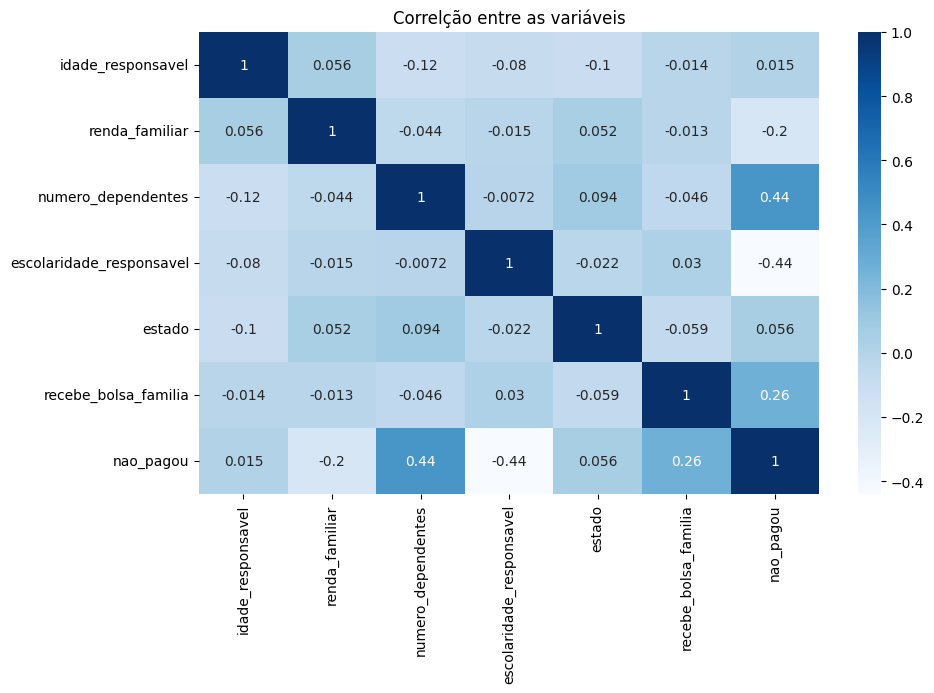

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de Calor da correlação

plt.figure(figsize=(10,6))

sns.heatmap(tabela.corr(), annot=True, cmap="Blues")

plt.title("Correlção entre as variáveis")

plt.show()

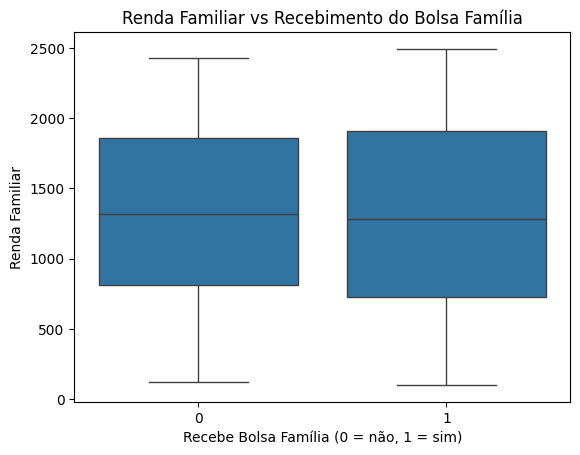

In [18]:
sns.boxplot(x="recebe_bolsa_familia", y="renda_familiar", data=tabela)
plt.title("Renda Familiar vs Recebimento do Bolsa Família")
plt.xlabel("Recebe Bolsa Família (0 = não, 1 = sim)")
plt.ylabel("Renda Familiar")
plt.show()



5° Passo - Separar dados em treino e teste

In [19]:
from sklearn.model_selection import train_test_split

# x = todas as colunas da tabela, menos a que queremos prever
x = tabela.drop(columns=["recebe_bolsa_familia"])

# y = a coluna alvo, aquela que queremos que o modelo aprenda a prever
y = tabela["recebe_bolsa_familia"]


# Separando DataSet em 70% treino e 30% teste
# OBS: Caso tenha muito treino e pouco teste, o modelo não será validado correamente, e caso haja muito teste ele não será devidamente treinado

x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size = 0.3,    # 30% para o teste
    random_state = 42,   # garante qua a divisão seja sempre a mesma
    stratify= y         # mantem a proporção de 0s e 1s igual nos dois conjuntos
)

# armazenar colunas usadas para o treinamento:
colunas_modelo = x_train.columns


# Verificando quantas linhas em cada parte

print(f'Tamanho do treino: {len(x_train)}')
print(f'Tamanho do teste: {len(x_test)}')

Tamanho do treino: 140
Tamanho do teste: 60


6° Passo - Escolha do modelo de classificação

-> Aqui escolheremos o modelo de árvore de decisão para prever se uma pessoa recebe ou não recebe o Bolsa Família.

In [20]:
from sklearn.tree import DecisionTreeClassifier

# criar o modelo
modelo = DecisionTreeClassifier(random_state=42)

# treinar o modelo com os dados de treino
modelo.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
# prever com os dados de teste
y_pred = modelo.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# acurácia total (quantos o modelo acertou)
print("Acurácia:", accuracy_score(y_test,y_pred))

# Relatório Completo: precisão, recall, f1_score
print("\nRelatótio de Classificação:")
print(classification_report(y_test,y_pred))

# Matriz de confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.65

Relatótio de Classificação:
              precision    recall  f1-score   support

           0       0.27      0.29      0.28        14
           1       0.78      0.76      0.77        46

    accuracy                           0.65        60
   macro avg       0.52      0.52      0.52        60
weighted avg       0.66      0.65      0.65        60


Matriz de Confusão:
[[ 4 10]
 [11 35]]


In [ ]:
# preparação para a predição de novos dados
def preparar_dados_para_predicao(df, colunas_modelo):
    for col in colunas_modelo:
        if col not in df.columns:
            df[col] = 0
    return df[colunas_modelo]

novos_dados = pd.read_csv("novos_dados.csv")


novos_dados_prontos = preparar_dados_para_predicao(novos_dados, colunas_modelo)

# fazer predição
predicao = modelo.predict(novos_dados_prontos)